In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image as im
import random
%autosave 190

Autosaving every 190 seconds


In [3]:
#all library needed for CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Input, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import optimizers,regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG19, DenseNet201, DenseNet121
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GroupShuffleSplit

from tensorflow.keras.datasets import cifar10

In [4]:
#loading datasets
(trainX, trainy), (testX, testy) = cifar10.load_data()


170500096/170498071 [==============================] - 105s 1us/step


In [6]:
trainX.shape, trainy.shape, testX.shape, testy.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

### It represents airplan, automobile, bird, cat, deer, dog, frog, horse, ship, truck >>> in order 0 - 9

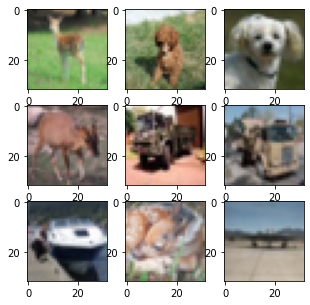

In [36]:
def exampleplot(pic):
    random.seed(99)
    n = 0
    randomlist = random.sample(range(0, pic.shape[0]), 9)
    fig, axm = plt.subplots(nrows=3, ncols=3, figsize=(5, 5))
    for axs in (axm):
        for ax in (axs):
#             idx = i * 5 + j
            ax.imshow(pic[randomlist[n]], cmap='gray')
            n += 1

    plt.show()

sample = trainX
exampleplot(sample)

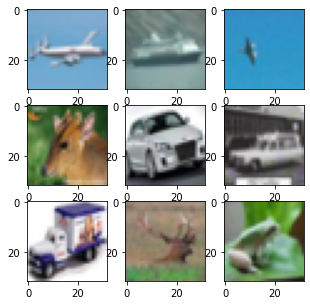

In [37]:
exampleplot(testX)

In [39]:
trainX = trainX / 255.0
testX = testX / 255.0
trainy = to_categorical(trainy)
testy = to_categorical(testy)

In [19]:
trainy.shape

(50000, 10)

In [49]:
model = tf.keras.models.Sequential([    


        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(32, 32, 3)),
#         tf.keras.layers.Flatten(input_shape = (28, 28)),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Dropout(0.10),

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.30),
    
        
    
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
        tf.keras.layers.Dropout(0.30),
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.50),
        tf.keras.layers.Dense(10, activation='softmax')
    
    
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
#               loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 15, 15, 512)       590336    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 512)         0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 7, 7, 1024)       

In [42]:
data_train = ImageDataGenerator(
    rotation_range = 8,
#     zoom_range=0.1
)
train_gen = data_train.flow(trainX, trainy, batch_size = 64, shuffle = True)

In [58]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 200)


In [59]:
# history = model.fit(train_gen, epochs=20, validation_data=(X_test, y_test))
history = model.fit(train_gen, epochs=35, 
                    validation_data=(testX, testy),
                    verbose = 0,
                   callbacks= [es])

In [60]:
def plot_history(history):    
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc)
    plt.plot(x, val_acc)
    plt.title('Accuracy vs. No. of epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(x, loss)
    plt.plot(x, val_loss)
    plt.title('Loss vs. No. of epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper right')
    plt.show()

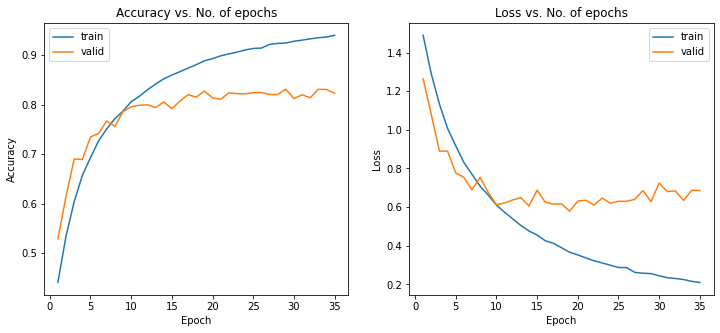

In [61]:
plot_history(history)

In [62]:
results = model.evaluate(testX, testy, verbose=0)
print('Test Loss: {:.5f}'.format(results[0]))
print('Test Accuracy: {:.2f}%'.format(results[1] * 100))

Test Loss: 0.68557
Test Accuracy: 82.30%


In [63]:
model.save("Cifar-10_model_temp1.h5")
# m1 = tf.keras.models.load_model("Digit_Recongnizer_model1_temp1.h5")

In [66]:
cifar10 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
dic = dict()
for name in cifar10:
    dic[name] = list()

In [67]:
pred = model.predict(testX)
errappend = list()
for i, v in enumerate(pred):
    index = np.argmax(testy[i])
    if np.argmax(pred[i]) != np.argmax(testy[i]):
        dic[cifar10[index]].append(0)
    elif np.argmax(pred[i]) == np.argmax(testy[i]):
        dic[cifar10[index]].append(1)
    else:
        errappend.append( (i, v) )
        

In [74]:
df = pd.DataFrame(dic)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,1,1,1,1,1,1,1,1,1,1
1,1,1,0,1,1,1,1,1,1,1
2,0,0,1,1,1,0,1,1,1,1
3,1,1,1,0,1,1,1,1,1,1
4,1,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,0,1,1,1,1,1,1
996,1,1,1,0,0,1,1,1,1,1
997,0,1,1,1,1,0,1,1,1,1
998,1,1,0,1,1,0,1,1,1,1


<ipython-input-110-668dd5245595>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',


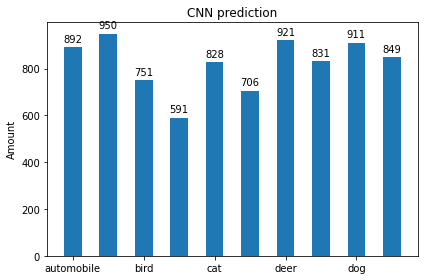

In [110]:
Ssum = [sum(l) for l in dic.values()]
ttotal = [1000 for i in range(10)]

x = np.arange(len(Ssum))
width = 0.5

fig, ax = plt.subplots()
rect1 = ax.bar(x, Ssum, width, label = 'correct')
# rect2 = ax.bar(x + width/2, ttotal, width, label = 'of total')

ax.set_ylabel('Amount')
ax.set_title("CNN prediction")
# ax.set_xticks(np.arange(10))
ax.set_xticklabels(('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
                   'frog', 'horse', 'ship', 'truck'))
# ax.legend()

ax.bar_label(rect1, padding = 3)
# ax.bar_label(rect2, padding = 3)

fig.tight_layout()

plt.show()

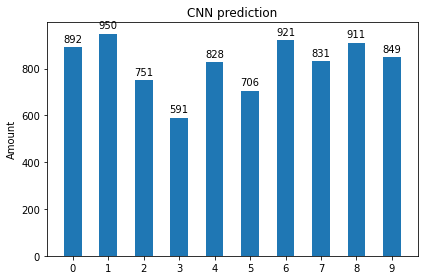

In [112]:
Ssum = [sum(l) for l in dic.values()]
ttotal = [1000 for i in range(10)]

x = np.arange(len(Ssum))
width = 0.5

fig, ax = plt.subplots()
rect1 = ax.bar(x, Ssum, width, label = 'correct')
# rect2 = ax.bar(x + width/2, ttotal, width, label = 'of total')

ax.set_ylabel('Amount')
ax.set_title("CNN prediction")
# ax.set_xticks(np.arange(10))
ax.set_xticks(np.arange(10))
# ax.legend()

ax.bar_label(rect1, padding = 3)
# ax.bar_label(rect2, padding = 3)

fig.tight_layout()

plt.show()

In [116]:
for i, n in enumerate(cifar10):
    print(i, ">>>", n)

0 >>> airplane
1 >>> automobile
2 >>> bird
3 >>> cat
4 >>> deer
5 >>> dog
6 >>> frog
7 >>> horse
8 >>> ship
9 >>> truck
